# Árvores II 

# Parte I - Árvore de Regressão

# Sumário <a name='contents'><a/>
1. [Associação entre variáveis](#AssociVar)
2. [Introdução](#intro)
3. [Construindo uma árvore de regressão](#ConstArReg)
4. [Visualizando a árvore](#VisTree)
5. [Funções e Métodos](#FuncMet)
6. [Pré-poda](#poda)
7. [Pós-poda](#Pp)

# Introdução (Árvore de regressão) <a name='intro'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

- Árvore com resposta contínua (diferentemente da árvore de decisão - para resposta discreta)
- Para classificar individuos em relação a uma variável contínua.

# Construindo uma árvore de regressão <a name='ConstArReg'><a/>

<div style='text-align:right'
    
[Voltar ao sumário](#contents)

In [9]:
# Importando bibliotecas necessárias

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

%matplotlib inline

In [10]:
# Carregando banco de dados

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


### Construindo a árvore

#### Dividindo a base em treino e teste

Já vimos que um perigo grande de um algoritmo é o *overfitting*, ou "o algoritmo aprender os dados". Isso significa que o algoritmo não fica geral o suficiente para ser aplicado em uma situação prática. Vimos também que uma forma interessante de evitar isto é dividir a base em uma parte de treinamento, e outra de teste, de modo que podemos avaliar o algoritmo na base de testes, e até fazer algumas modificações no algoritmo com essa base.

Vamos repetir esse passo diversas vezes ainda, então vamos lá:
- vamos colocar a variável "tip" como variável resposta (y)
- as demais variáveis são as preditoras, vão ficar no objeto X.

Lembre-se de que o Scikitlearn não aceita variáveis string nem *missing*. Nesse caso vamos precisar do "get_dummies" para transformar as variáveis qualitativas em variáveis indicadoras, ou variáveis *dummy*.

In [13]:
# Preparando a base de dados

X = tips.drop(columns=['total_bill', 'tip', 'tip_pct']).copy()
X.head()

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4


In [14]:
# Transformando em dummies, 
# variáveis contínuas para operar com o scikit-learn

X = pd.get_dummies(X, drop_first=True)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   size         244 non-null    int64
 1   sex_Female   244 non-null    bool 
 2   smoker_No    244 non-null    bool 
 3   day_Fri      244 non-null    bool 
 4   day_Sat      244 non-null    bool 
 5   day_Sun      244 non-null    bool 
 6   time_Dinner  244 non-null    bool 
dtypes: bool(6), int64(1)
memory usage: 3.5 KB
None


,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,2,True,True,False,False,True,True
1,3,False,True,False,False,True,True
2,3,False,True,False,False,True,True
3,2,False,True,False,False,True,True
4,4,True,True,False,False,True,True


In [15]:
# Variável resposta

y = tips.loc[:, 'tip']
# y=tips.tip
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [16]:
# Separando a base de dados para teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

In [17]:
# Fit regression model (duas árvores)

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [18]:
# Avaliando a qualidade da árvore a partir do método score

# O método 'score' retorna o coeficiente de determinação da árvore
# R2 - coeficiente de determinação ou R^2(R-squared)
R2_1 = regr_1.score(X_train, y_train)
R2_2 = regr_2.score(X_train, y_train)

template = 'O R-quadrado da árvore com profundidade = {0} é: {1:.2f}'

print(template.format(regr_1.get_depth(), R2_1).replace('.', ','))
print(template.format(regr_2.get_depth(), R2_1).replace('.', ','))

O R-quadrado da árvore com profundidade = 2 é: 0,23
O R-quadrado da árvore com profundidade = 7 é: 0,23


# Visualizando a árvore <a name='VisTree'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

Três formas de visualizar a árvore: 1. Visualizar a forma gráfica com `plot_tree`; 2. visualizar a árvore com o `graphvis`; 3. Representação impressa da árvore.

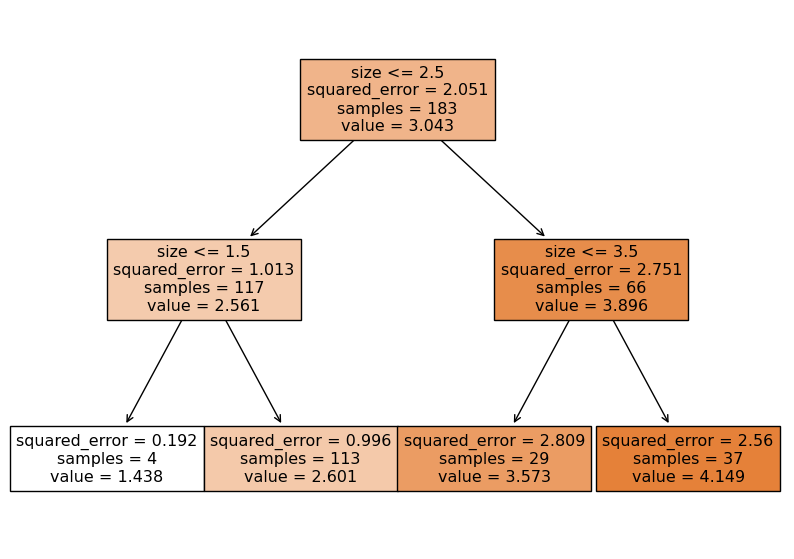

In [21]:
plt.rc('figure', figsize=[10,7])
tp = tree.plot_tree(
    regr_1,
    feature_names=X.columns,
    filled=True
)

#### Visualização da forma impressa da árvore

A árvore de regressão pode ser expressa na forma impressa, regra a regra com o comando:

In [23]:
representacao_textual = tree.export_text(regr_1)
print(representacao_textual)

|--- feature_0 <= 2.50
|   |--- feature_0 <= 1.50
|   |   |--- value: [1.44]
|   |--- feature_0 >  1.50
|   |   |--- value: [2.60]
|--- feature_0 >  2.50
|   |--- feature_0 <= 3.50
|   |   |--- value: [3.57]
|   |--- feature_0 >  3.50
|   |   |--- value: [4.15]



#### Instalando o `graphviz` e o `dtreeviz`

Ambos os pacotes fornecem recursos interessantes de visualização de árvores. [Link](https://github.com/parrt/dtreeviz) para instalação.

In [25]:
import graphviz 

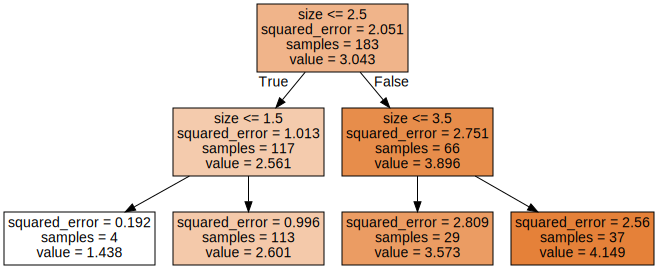

In [26]:
# Para a primeira árvore
dot_data = tree.export_graphviz(
    regr_1, out_file=None,
    feature_names=X.columns,
    filled=True
)

# Desenhando o gráfico
graph = graphviz.Source(dot_data, format='png')
graph

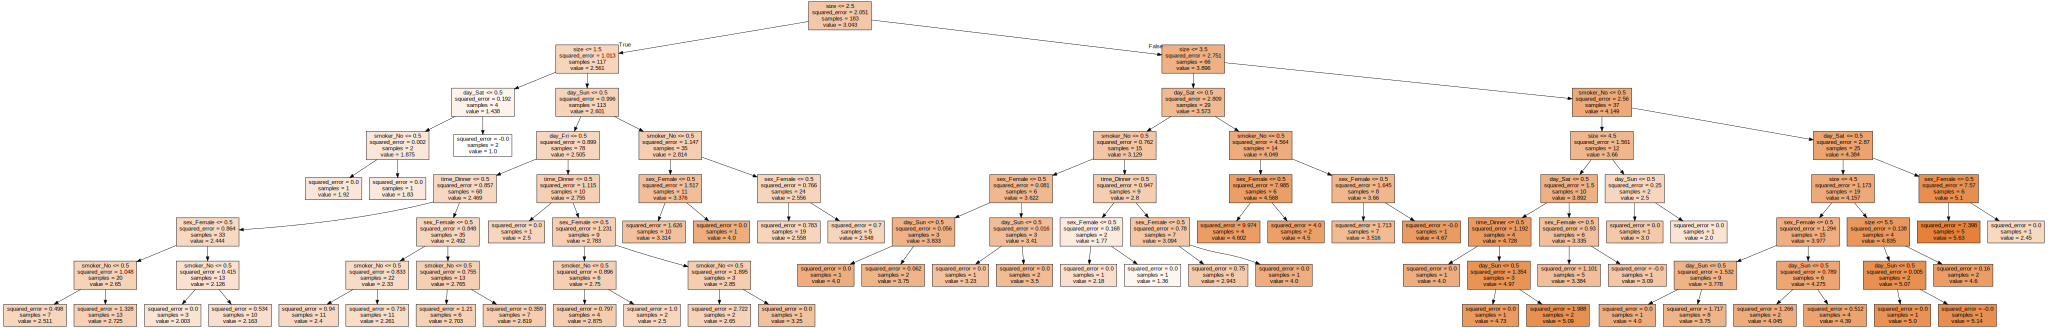

In [27]:
# Para a segunda árvore
dot_data = tree.export_graphviz(
    regr_2, out_file=None,
    feature_names=X.columns,
    filled=True
)

# Desenhando o gráfico
graph = graphviz.Source(dot_data, format='png')
graph

# Pré-poda <a name='poda'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

In [29]:
# Controle da profundidade da árvore e as observações na forlha
regr_1 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

In [30]:
# Coeficiente de determinação da árvore obtido pelo score

R2_1 = regr_1.score(X_test, y_test) # Nos dados de teste
R2_1

0.2392376384366276

Desta forma o modelo explica 24% da variabilidade da variável resposta.

In [32]:
# Modificando a poda da árvore

regr_1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1)
regr_1.fit(X_train, y_train)

# O coeficiente de determinação agora é:
R2_1 = regr_1.score(X_test, y_test) # Nos dados de teste
R2_1

0.05314658006831263

Sendo assim a árvore, para essa poda, explica ~5,3% da variabilidade da variável resposta. Bem inferior aos valores anteriores, ou seja, pode indicar um overfitting do modelo. 

- Isso destaca a relevância da pré-poda.

In [34]:
# Testando outros valores 

regr_1 = DecisionTreeRegressor(max_depth=2, min_samples_leaf=24)
regr_1.fit(X_train, y_train)

# O coeficiente de determinação
regr_1.score(X_test, y_test)

0.2593704356267099

Os valores para poda, `max_depth` e `min_samples_leaf`, variam de acordo com o conjunto de dados.

In [36]:
# Avaliando os dados de poda

R2s = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(5, 35):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        R2 = regr_1.score(X_test, y_test)
        R2s.append(R2)
        ind_i.append(i)
        ind_j.append(j)

# Criando um DataFrame com os dados
df_R2s = pd.DataFrame({'R2s':R2s, 'profundidade': ind_i, 'n_minimo': ind_j})
df_R2s.head()

,R2s,profundidade,n_minimo
0,0.169952,1,5
1,0.169952,1,6
2,0.169952,1,7
3,0.169952,1,8
4,0.169952,1,9


<Axes: xlabel='n_minimo', ylabel='profundidade'>

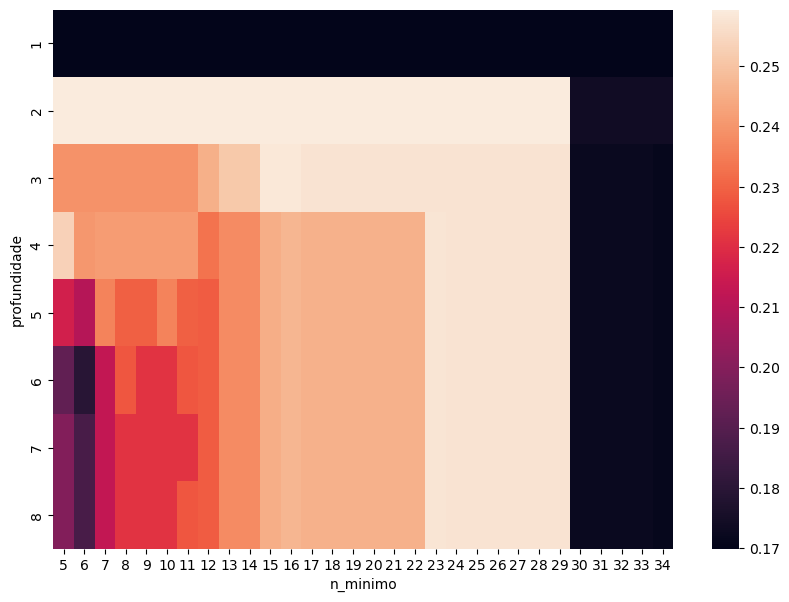

In [37]:
# Gerando uma tabela pivô

tabela = df_R2s.pivot(index='profundidade', columns='n_minimo', values='R2s')
# tabela
sns.heatmap(tabela)

**Grid search --> uma busca pelo algoritmo ótimo, ou seja, os melhores valores para o modelo.

# Pós-poda (post pruning) <a name='Pp'><a/>

<div style='text-align:right'

[Voltar ao sumário](#contents)

A `pós poda` consiste em reduzir a complexidade da árvore, observando a partir de uma base de treinamento.

##### CCP e o caminho da árvore

CCP *(cost complexity parameter)* - Parâmetro de custo de complexidade é um indicador da complexidade da árvore (nós, profundidade, quantidade de observações etc) e auxilia na realização da poda. Esse parâmetro é chamado de `Alpha`.

In [42]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 2.34900776e-06, 2.21311475e-05, 5.35519126e-05,
        7.65482696e-05, 2.27686703e-04, 2.34448248e-04, 2.65573770e-04,
        3.03582271e-04, 3.21481014e-04, 3.93606557e-04, 4.72131148e-04,
        5.81445604e-04, 7.10040984e-04, 8.67213115e-04, 1.13817600e-03,
        1.20710383e-03, 1.46894353e-03, 1.83715847e-03, 2.33778440e-03,
        2.73224044e-03, 3.85614754e-03, 4.18374317e-03, 4.86353977e-03,
        5.22971637e-03, 6.10091153e-03, 6.37064793e-03, 1.27133065e-02,
        1.40943130e-02, 1.54579755e-02, 2.01481897e-02, 2.15387295e-02,
        2.85768555e-02, 3.04630024e-02, 3.14966462e-02, 4.10774125e-01]),
 'impurities': array([1.25120884, 1.25121119, 1.25123332, 1.25128687, 1.25136342,
        1.25159111, 1.25182556, 1.25209113, 1.25239471, 1.25271619,
        1.2531098 , 1.25358193, 1.25416338, 1.25700354, 1.25787075,
        1.25900893, 1.26021603, 1.26168498, 1.26352214, 1.26585992,
        1.26859216, 1.27244831, 1.27663205, 1.2814

#### A impureza da árvore em função do Alpha

Text(0, 0.5, 'Impureza total das folhas')

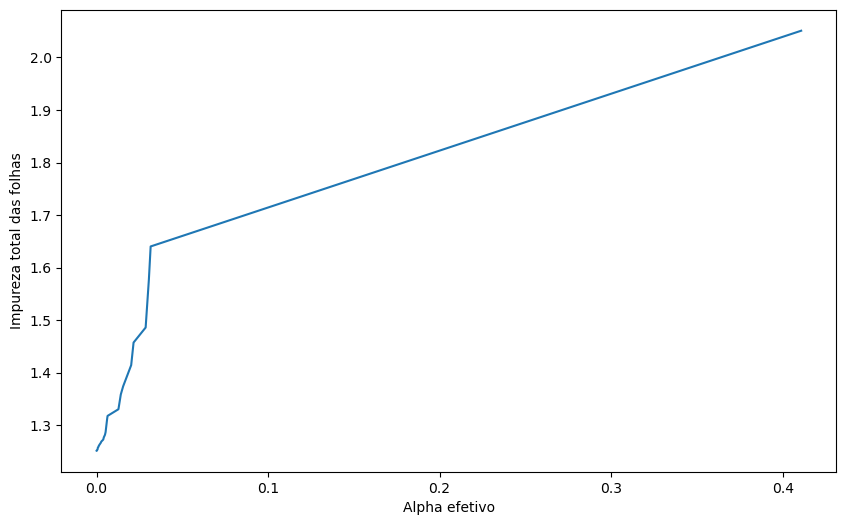

In [44]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=[10,6])
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas')

#### Profundidade da árvore em função do Alpha



In [46]:
# Construindo uma nova árvore

clfs = []
# A lista contém todas as árvore possíveis com os diferentes ccps

for ccp_alpha in ccp_alphas:
    # novas árvores
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs. append(clf)

Text(0, 0.5, 'Profundidade da árvore')

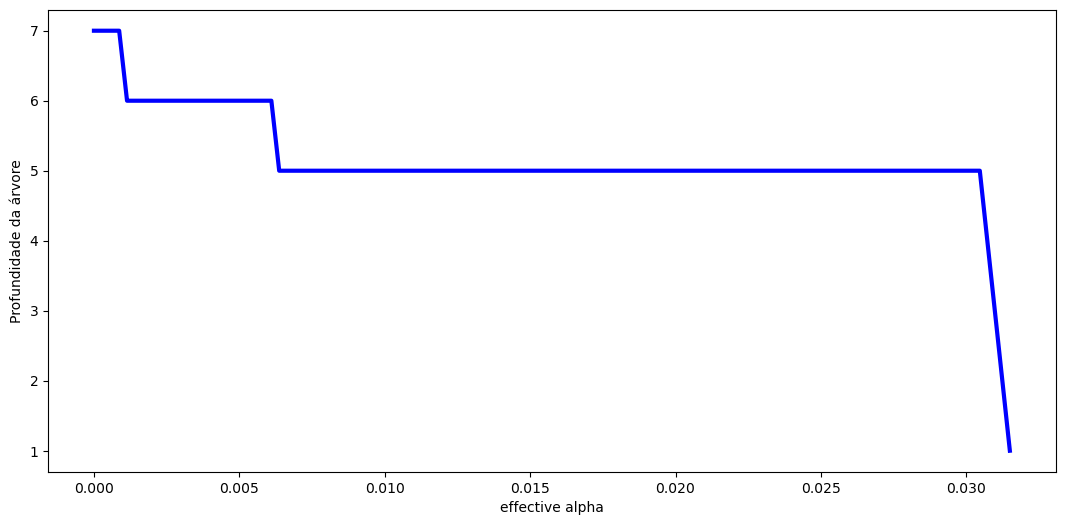

In [47]:
# Obtendo a profundidade de cada árvore e plotando em função do alpha

tree_depths = [clf.tree_.max_depth for clf in clfs]

plt.figure(figsize=[13, 6])
plt.plot(ccp_alphas[:-1], tree_depths[:-1], lw=3, color='b')
# plt.plot(ccp_alphas, tree_depths)
plt.xlabel('effective alpha')
plt.ylabel('Profundidade da árvore')

> Como pode-se notar, o aumento do ccp penaliza o "crescimento" da árvore. Sendo que a última árvore possui profundidade igual a 1, é basicamente uma única folha.

#### O MSE da árvore em função do Alpha



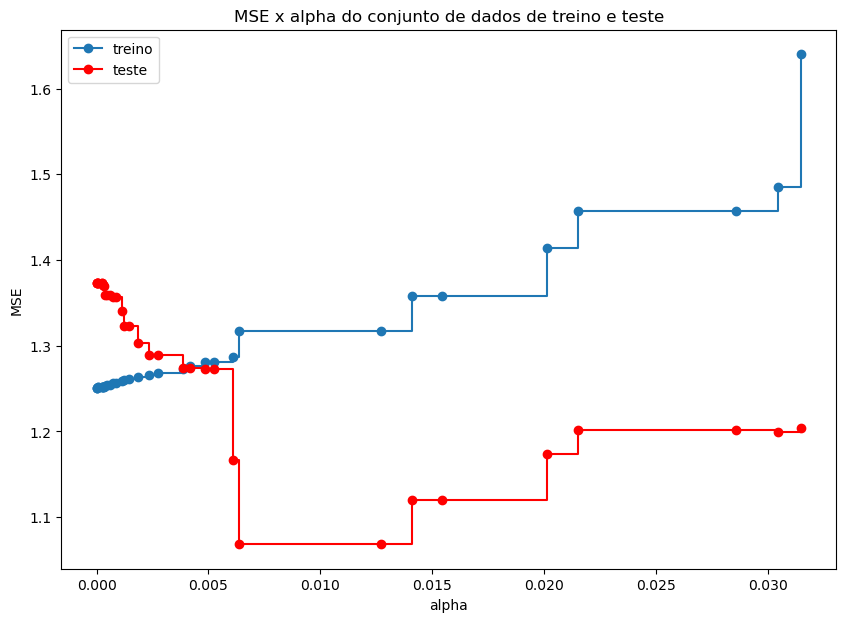

In [50]:
train_score = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
test_score = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas[:-1], train_score[:-1], marker='o', label='treino', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1], test_score[:-1], marker='o', label='teste', drawstyle='steps-post', color='r')
# ax.set(xlim=(0,0.005))
ax.legend()
plt.show()

# ax.plot(ccp_alphas, train_score,ls='-.', marker='o', label='treino', drawstyle='steps-post')
# ax.plot(ccp_alphas, test_score, marker='o', label='teste', drawstyle='steps-post')
# ax.set(xlim=(0,0.005))

- Quando maior e mais complexa a árvore na base de treinamento menor o erro. Porém, conforme a árvore diminui (com o aumento de alpha) o erro tende a aumentar, como é apresentado pelo gráfico de `treino`. 

- A base de testes tem um erro maior para árvores grandes e complexas. Tal erro tende a diminuir com o ajuste da árvore, porém isso pode indicar um overfitting, claro que há valores mais adequados dentro do conjunto.

Há, dentro do conjunto, uma árvore "ótima" (um ponto ótimo).

In [52]:
# Buscando o ponto ótimo

arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=.03)
arvore_final.fit(X_train, y_train)

print('Profundidade: {}'.format(arvore_final.tree_.max_depth))
print('R-quadrado na base de testes: {:.2f}'.format(arvore_final.score(X_test, y_test)))
print('MSE na base de testes: {:.2f}'.format(mean_squared_error(y_test, arvore_final.predict(X_test))))

Profundidade: 5
R-quadrado na base de testes: 0.17
MSE na base de testes: 1.20


#### Exemplo intuitivo de pós-poda

Extraído do [link](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py).

In [54]:
# Criando um dataset randômico 

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [55]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=10)

regr_1.fit(X, y), regr_2.fit(X, y), regr_3.fit(X, y)

(DecisionTreeRegressor(max_depth=2),
 DecisionTreeRegressor(max_depth=5),
 DecisionTreeRegressor(max_depth=10))

In [56]:
# Predição 

X_test = np.arange(0.0, 5.0, 0.001)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

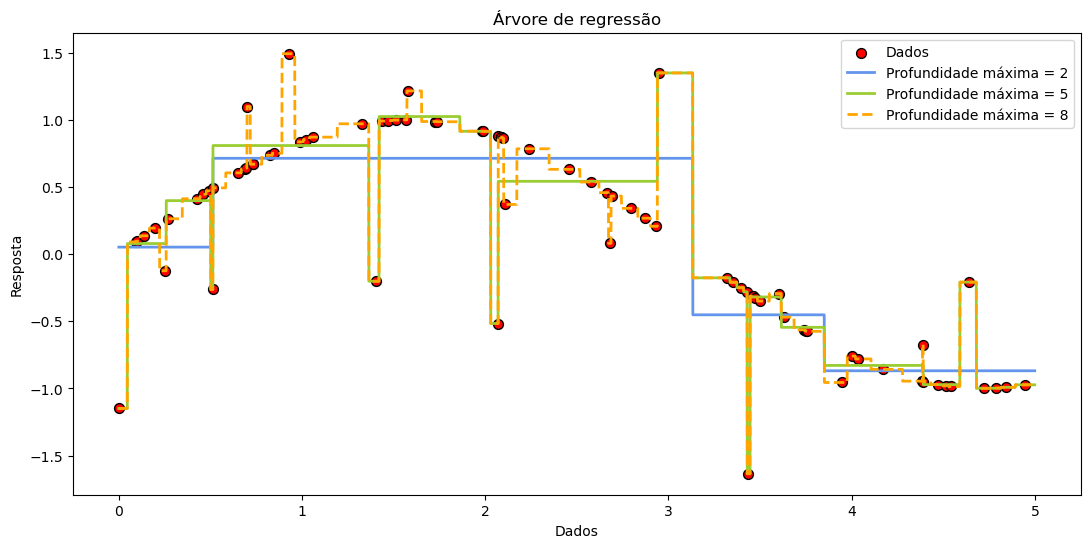

In [57]:
# Plot dos resultados

plt.figure(figsize=[13, 6])
plt.scatter(X, y, s=50, edgecolor='black', c='red', label='Dados')
plt.plot(X_test, y_1, color='cornflowerblue', label='Profundidade máxima = 2',
         linewidth=2)
plt.plot(X_test, y_2, color='yellowgreen', label='Profundidade máxima = 5',
         linewidth=2)
plt.plot(X_test, y_3, color='orange', label='Profundidade máxima = 8', ls='--', lw=2)
plt.xlabel('Dados')
plt.ylabel('Resposta')
plt.title('Árvore de regressão')
plt.legend()
plt.show()

> Um fato interessante a ser observado é a tendência a um `overfitting` para árvores muito profundas. Tais modelos buscam até mesmo dados outliers mais distantes, enquanto árvores com profundidade menor são mais generalizadoras.

# Funções e Métodos <a name='FuncMet'><a/>


- `pd.get_dummies()`
- `X_train, X_test, y_train, y_test = train_test_split(X, y)`
- `DecisionTreeRegressor()`
- `.fit()`
- `score()` --> Retorna o coeficiente de determinação da árvore
- `tree.plot_tree()`
- `graphviz()`
- `tree.export_text()` --> Visualização impressa da árvore (representação textual)
- `tree.export_graphviz()` and `graphviz.Source()` --> Visualização desenhada da árvore
- `pandas.pivot_table()` --> Create a spreadsheet-style pivot table as a DataFrame.
- `DataFrame.pivot()` --> Return reshaped DataFrame organized by given index / column values.
- `.cost_complexity_pruning_path()` --> Retorna o `ccp_alphas` e as `imputirities`, o MSE.